In [93]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Spectral"))
sns.set_style("darkgrid")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams["axes.labelsize"] = 15
pd.set_option('display.max_columns', 999)

In [50]:
fort_worth_stat_num = 23104
df = pd.read_csv("HPI_AT_metro.csv")
df.columns
fort_worth = df[df["Statistical Area Number"] == fort_worth_stat_num]
fort_worth = fort_worth[fort_worth["Year"].isin(range(2018,2023))]
fort_worth["Index"] = fort_worth["Index"].astype(float)
fw_index = fort_worth.groupby("Year").mean()["Index"]
fw_index/=fw_index[2018]
fw_index

Year
2018    1.000000
2019    1.051777
2020    1.099225
2021    1.268981
2022    1.542491
Name: Index, dtype: float64

In [77]:
broadmoor = pd.read_csv("closest_addresses_to_2900 Broadmoor Dr, Fort Worth TX.csv")
tanacross = pd.read_csv("closest_addresses_to_3600 Tanacross Dr, Fort Worth TX.csv")
tanacross
tanacross.iloc[:,1:] = tanacross.iloc[:,1:].apply(lambda x: x/x["2018 Appraisal"], axis = 1)
broadmoor.iloc[:,1:] = broadmoor.iloc[:,1:].apply(lambda x: x/x["2018 Appraisal"], axis = 1)
broadmoor_index = broadmoor.mean()
tanacross_index = tanacross.mean()

C:\Users\randymi\AppData\Local\Temp\ipykernel_27616\648739657.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  broadmoor_index = broadmoor.mean()
C:\Users\randymi\AppData\Local\Temp\ipykernel_27616\648739657.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tanacross_index = tanacross.mean()


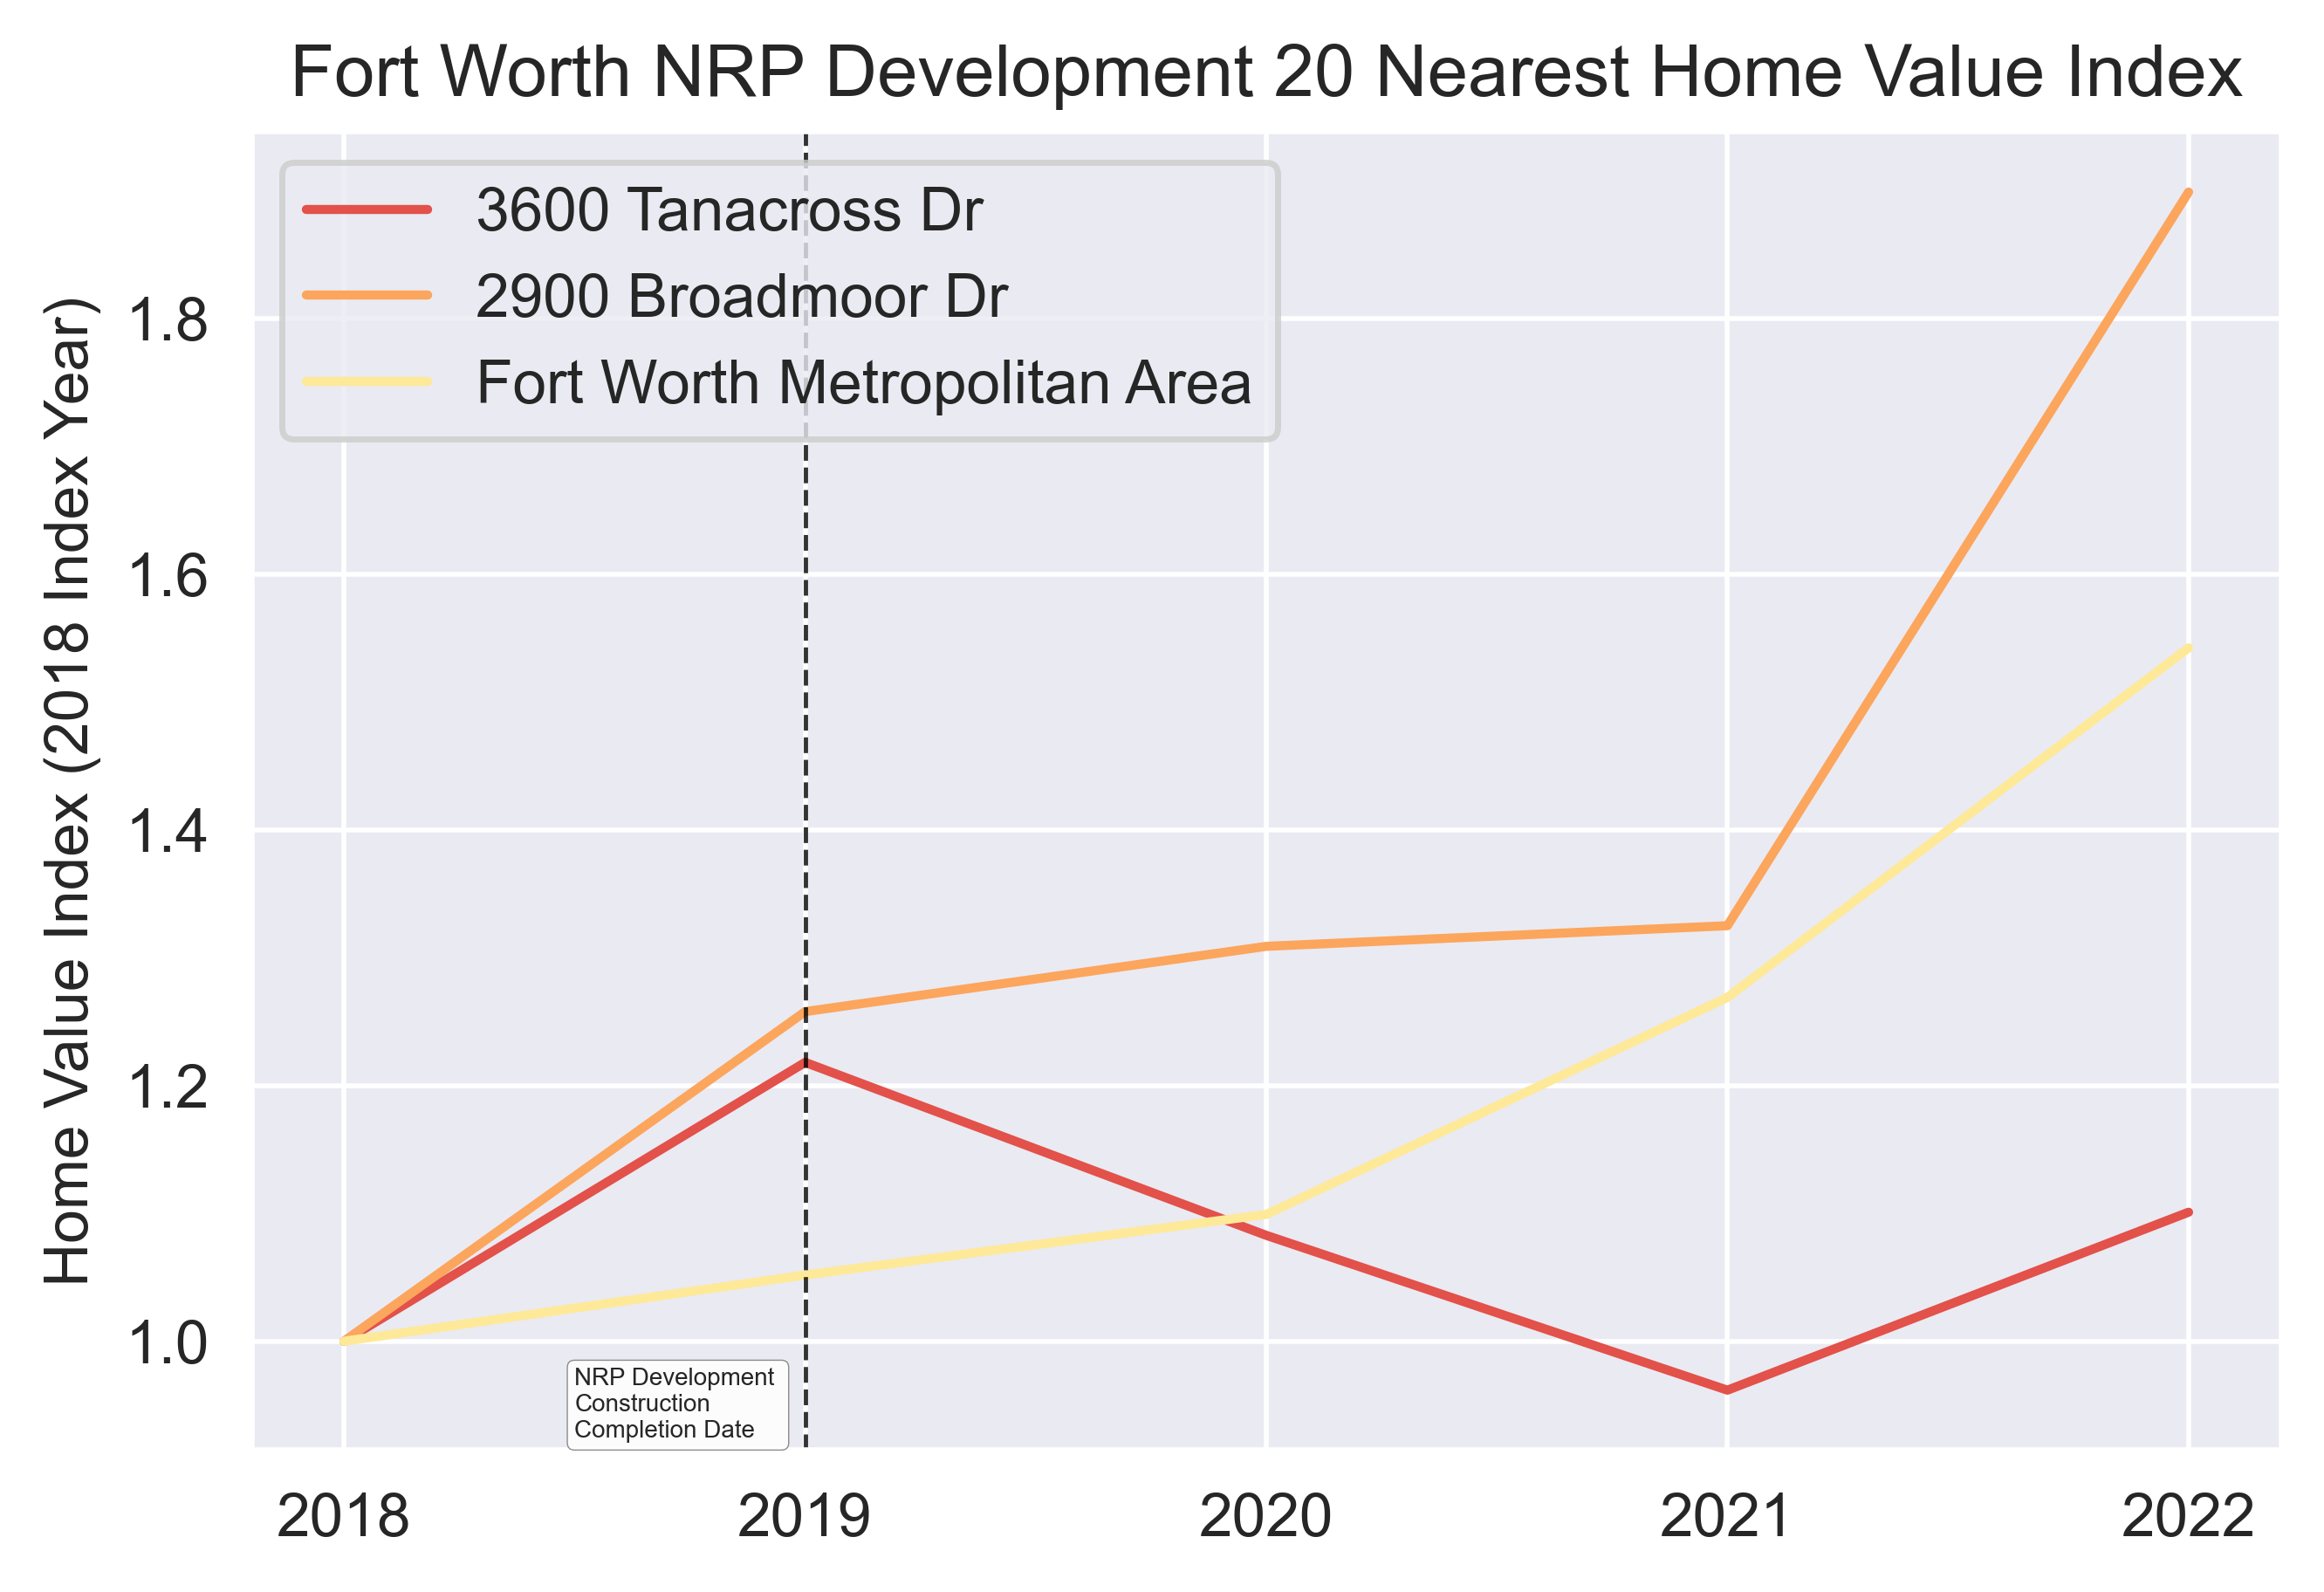

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([2018,2019,2020,2021,2022],tanacross_index, label = "3600 Tanacross Dr")
ax.plot([2018,2019,2020,2021,2022],broadmoor_index, label = "2900 Broadmoor Dr")
ax.plot([2018,2019,2020,2021,2022],fw_index, label = "Fort Worth Metropolitan Area")
ax.set_xticks([2018,2019,2020,2021,2022])
ax.legend(loc="upper left")
ax.set_title("Fort Worth NRP Development 20 Nearest Home Value Index")
ax.set_ylabel("Home Value Index (2018 Index Year)",fontsize = 10)
ax.axvline(2019, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8)
ax.text(2018.5, 0.95, 'NRP Development \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4,
         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))
fig.savefig("Fort Worth NRP Development 20 Nearest Home Value Index.png")


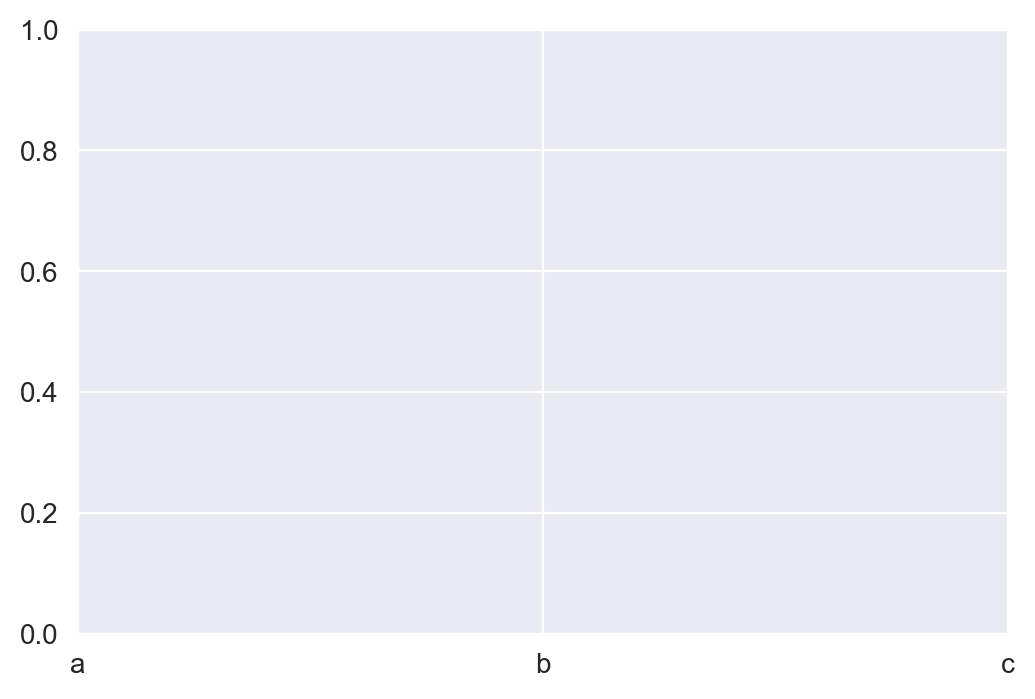

In [81]:
ticks = [0, 1, 2]
labels = ["a", "b", "c"]

plt.figure()
plt.xticks(ticks, labels)
plt.show()